<a href="https://colab.research.google.com/github/guimazzolino/MVP-I/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP I - Guilherme Fernandes Viana Mazzolino

Este MVP consiste em carregar um dataset "California Independent Medical Review Dataset", importados do site kaggle.
Desse modo, a base de dados será analisada de modo a traçar um perfil dos diagnósticos das doenças, para que, assim, 

In [ ]:
#=== No primeiro momento, importo os pacotes a serem utilizados e a base de dados ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

dataset = pd.read_csv('/content/Independent_Medical_Review__IMR__Determinations__Trend.csv')

#Agrupo, por ano, as categorias de doenças
grouped = dataset.groupby(['Report Year', 'Diagnosis Category']).size().groupby(level=0).nlargest(10)

# Transforma os dados em uma tabela com anos nas linhas e categorias de diagnóstico nas colunas
stacked = grouped.unstack(level=1)

# Retorna os dados como um dataframe
df_top10 = stacked.reset_index().melt(id_vars=['Report Year'], var_name='Diagnosis Category', value_name='Count')

# Ordena os dados pelo ano e contagem de ocorrências
df_top10 = df_top10.sort_values(['Report Year', 'Count'], ascending=[True, False])

# Seleciona apenas as top 10 doenças por ano
df_top10 = df_top10.groupby('Report Year').head(10)

# Exibe o dataframe com as top 10 doenças por ano
print(df_top10)

     Report Year  Diagnosis Category                                  Count
9           2001  Diagnosis Category                                   Skin
8           2001  Diagnosis Category            Orthopedic/ Musculoskeletal
7           2001  Diagnosis Category                      OB-Gyn/ Pregnancy
6           2001  Diagnosis Category                         Morbid Obesity
5           2001  Diagnosis Category                                 Mental
..           ...                 ...                                    ...
154         2016  Diagnosis Category                   Endocrine/ Metabolic
153         2016  Diagnosis Category     Digestive System/ Gastrointestinal
152         2016  Diagnosis Category  Central Nervous System/ Neuromuscular
151         2016  Diagnosis Category                    Cardiac/Circulatory
150         2016  Diagnosis Category                                 Cancer

[160 rows x 3 columns]


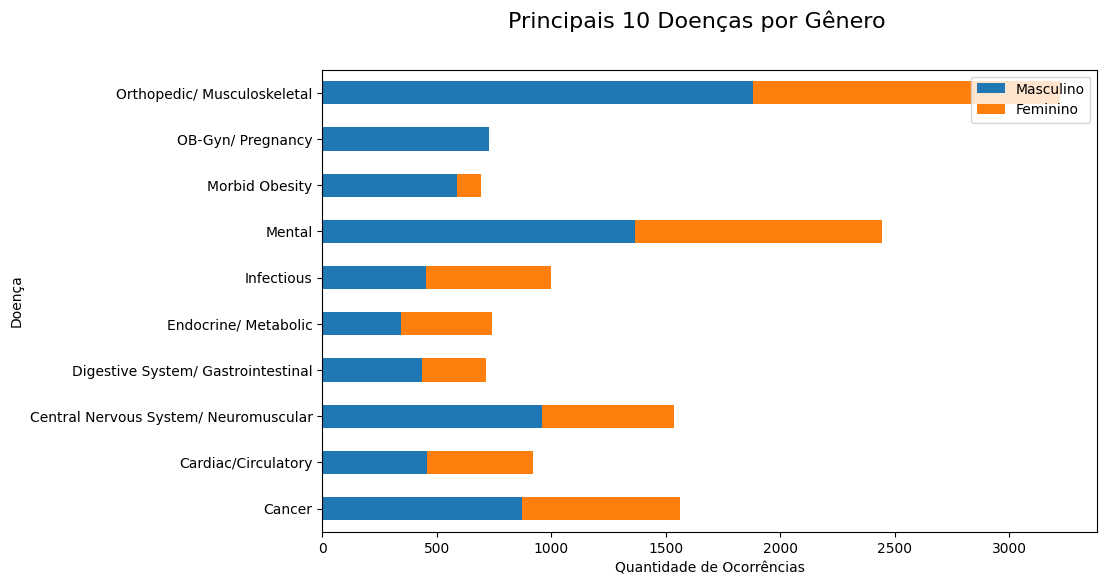

In [ ]:
# Filtra as 10 principais doenças
top_10_diseases = dataset['Diagnosis Category'].value_counts().nlargest(10).index
df_top_10 = dataset[dataset['Diagnosis Category'].isin(top_10_diseases)]

# Agrupa os dados por gênero e categoria de diagnóstico
grouped = df_top_10.groupby(['Diagnosis Category', 'Patient Gender'])

# Obtem o número total de ocorrências de cada doença
counts = grouped.size()

# Transforma os dados em uma tabela com doenças nas linhas e gênero nas colunas
stacked = counts.unstack()

# Cria o gráfico de colunas empilhadas
ax = stacked.plot(kind='barh', stacked=True, position=0.5, figsize=(10, 6))

# Define o título, legenda e os rótulos dos eixos
plt.suptitle('Principais 10 Doenças por Gênero', fontsize=16)
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Doença')
plt.legend(title='Gênero')

# Configura o layout do gráfico
ax.legend(['Feminino', 'Masculino'], loc='upper right')
plt.subplots_adjust(hspace=0.4)

# Mostra o gráfico
plt.show()




In [ ]:
a = dataset.groupby(['Diagnosis Category']).size()
print(a)

Diagnosis Category
Alcohol and Drug Addiction                  3
Autism Spectrum                           524
Blood Related                             101
Cancer                                   1681
Cardiac/Circulatory                       965
Central Nervous System/ Neuromuscular    1620
Chronic Pain                              122
Dental                                     76
Digestive System/ Gastrointestinal        758
Ears, Nose, Throat                        376
Endocrine/ Metabolic                      779
Foot                                      214
Genetic                                    99
Genitourinary/ Kidney                     350
Immunologic                               343
Infectious                               1059
Mental                                   2512
Morbid Obesity                            824
Not Applicable                             63
OB-Gyn/ Pregnancy                         801
Organ Failure                               8
Orthopedic/ Mus

In [ ]:
# Agrupa por ano e categoria de diagnóstico e obtém as 10 principais doenças para cada ano
grouped = dataset.groupby(['Report Year', 'Diagnosis Category']).size().groupby(level=0).nlargest(10)

# Transforma os dados em uma tabela com anos nas linhas e categorias de diagnóstico nas colunas
stacked = grouped.unstack(level=1)

# Retorna os dados como um dataframe
df_top10 = stacked.reset_index().melt(id_vars=['Report Year'], var_name='Diagnosis Category', value_name='Count')

# Ordena os dados pelo ano e contagem de ocorrências
df_top10 = df_top10.sort_values(['Report Year', 'Count'], ascending=[True, False])

# Seleciona apenas as top 10 doenças por ano
df_top10 = df_top10.groupby('Report Year').head(10)

# Exibe o dataframe com as top 10 doenças por ano
print(df_top10)













# =============== Gráficos de Ocorrências por Ano ================================
corDefault = '#6688AA' #Esta é a cor que será utilizada nos gráficos do MVP

#===== Histograma de Ocorrências por Ano =====
base = dataset['Report Year'].value_counts().sort_index() # Ordena os valores por ano
base.view()
fig, ax = plt.subplots(figsize = (15,6)) #Define o tamanho do gráfico

# Customização do gráfico com a cor, título e nome dos eixos
base.plot(ax=ax, kind='bar',color = corDefault)
ax.bar_label(ax.containers[0])
plt.xlabel('Anos')
plt.ylabel('Qtd Ocorrências')
plt.title('Ocorrências por Ano')
plt.show()




     Report Year  Diagnosis Category                                  Count
9           2001  Diagnosis Category                                   Skin
8           2001  Diagnosis Category            Orthopedic/ Musculoskeletal
7           2001  Diagnosis Category                      OB-Gyn/ Pregnancy
6           2001  Diagnosis Category                         Morbid Obesity
5           2001  Diagnosis Category                                 Mental
..           ...                 ...                                    ...
154         2016  Diagnosis Category                   Endocrine/ Metabolic
153         2016  Diagnosis Category     Digestive System/ Gastrointestinal
152         2016  Diagnosis Category  Central Nervous System/ Neuromuscular
151         2016  Diagnosis Category                    Cardiac/Circulatory
150         2016  Diagnosis Category                                 Cancer

[160 rows x 3 columns]
